
<h2>ES654 - ML Prerequisite Test<h2>

**Question_1:**
    
In the following question, there is a matrix multiplication between a $(n, k)$ and $(k, m)$ matrix which results in a $(n, m)$ matrix. <br>
Let $A$ be a matrix of dimension $(n, k)$ & $B$ be a matrix of dimension $(k, m)$ <br>
$C$ be the Resultant matrix of dimension $(n, m)$ <br>

**$A * B = C$** <br>

When doing matrix multiplication,the dot product of $n$ rows of $A$ is done with $m$ columns of $B$: In this step when dot product of one row with one column takes place, since there are $k$ number of elements in each row and in each column: it will result in a total of: <br>
$(k)$ multiplications and $(k-1)$ additions. <br>

Total dot product of each row of $A$ with each column of $B$ will lead to: $(n * m)$ operations. <br>

Therefore, <br>
Total number of multiplications: (number of operations * multiplications in 1 operation of dot product) <br>
Total number of additions: (number of operations * additions in 1 operation of dot product) <br>

**Total number of multiplications = $(n * m) * (k) = n*m*k$ <br>
Total number of additions = $(n * m) * (k - 1) = n*m*(k-1)$** <br>



**Question_2:**

In [1]:
import numpy as np
import timeit

n = int(input())
k = int(input())
m = int(input())

A = np.random.randint(100, size = (n, k))
B = np.random.randint(100, size = (k, m))

def multiply_using_lists(A, B):
    C = np.zeros((n, m), dtype = int)
    for x in range(n):
        for y in range(m):
            for z in range(k):
                C[x][y] += A[x][z] + B[z][y]
                
    return C

def multiply_using_numpy(A, B):
    C = np.dot(A,B)
    return C

C1 = multiply_using_lists(A, B)
t_1 = timeit.Timer('multiply_using_lists(A, B)', 'from __main__ import multiply_using_lists, A, B')
repeated_1 = t_1.repeat(2000, 1)
avg_time1 = sum(repeated_1)/len(repeated_1)
std_time1 = np.std(repeated_1)

C2 = multiply_using_numpy(A, B)
t_2 = timeit.Timer('multiply_using_numpy(A, B)', 'from __main__ import multiply_using_numpy, A, B')
repeated_2 = t_2.repeat(2000, 1)
avg_time2 = sum(repeated_2)/len(repeated_2)
std_time2 = np.std(repeated_2)

print("\n The Resultant matrix formed by Method 1: Using Lists of lists is: \n", C1)
print("\n The method 1: Using Lists of lists takes ", avg_time1, "seconds with the standard deviation of", std_time1, "seconds.")

print("\n The Resultant matrix formed by Method 2: Using numpy is: \n", C2)
print("\n The method 2: Using numpy takes ", avg_time2, "seconds with the standard deviation of", std_time2, "seconds.")

3
4
4

 The Resultant matrix formed by Method 1: Using Lists of lists is: 
 [[293 339 274 349]
 [351 397 332 407]
 [382 428 363 438]]

 The method 1: Using Lists of lists takes  5.7780642000182067e-05 seconds with the standard deviation of 6.728669688175146e-05 seconds.

 The Resultant matrix formed by Method 2: Using numpy is: 
 [[ 3618  8357  2266  9000]
 [ 5392  8908  4510 10959]
 [10100  7230  7537 12096]]

 The method 2: Using numpy takes  1.7029600005997737e-06 seconds with the standard deviation of 5.253383960995819e-07 seconds.


From the above results we can conclude that method 1: using lists of lists takes more time than method 2: using numpy. The reason for the same is that, method 1 makes the use of 3 nested loops such that the time complexity comes out to be $O(n*k*m$). <br> 
<br>
Method 2: using numpy, is relatively faster since numpy uses optimized BLAS Library in its $np.dot$ function which is very fast. 
<br>
<br>
Therefore, on comparing the two methods, **matrix multiplication using numpy is more efficient and faster than using the lists of lists method**

<br>

**Question_3**


In [19]:
import math
n=int(input())
array = np.random.randint(1, 50, size=n)

def my_median(array):
  n = len(array)
  copy_arr = array.copy()
  secMax = -math.inf
  maxm = -math.inf 
  i = 1 

  while (i <= n//2+1): 
    maxm = -100000
    index_max = -1
    for j in range(0, n):
      if (copy_arr[j] > maxm):
        maxm = copy_arr[j]
        index_max =  j 
    if (n %2 == 0 and i == n//2):
      secMax = maxm
    copy_arr[index_max] = -100000
    i += 1

  if (n % 2):
    return maxm 
  else:
    return (maxm+secMax)/2

def sorting(array):
  array.sort()

  if len(array)%2 == 0:
    return (array[len(array)//2]+array[(len(array)//2)-1])/2
  else: 
    return array[len(array)//2]

def inbuilt(array):
  return np.median(array)

print(array) 

my_med = my_median(array)
sort_med = sorting(array)
inbuilt_med = inbuilt(array)

# Time calculation for my method 
my_time = timeit.Timer('my_median(array)', 'from __main__ import my_median, array')
my_rep = my_time.repeat(20000, 1)
my_meantime = sum(my_rep) / len(my_rep)
my_sd = np.std(my_rep)

# Time calcualtion for sorting method
sort_time = timeit.Timer('sorting(array)', 'from __main__ import sorting, array')
sort_rep = sort_time.repeat(20000, 1)
sort_meantime = sum(sort_rep) / len(sort_rep)
sort_sd = np.std(sort_rep)

# Time calculation for numpy.median method
inbuilt_time = timeit.Timer('inbuilt(array)', 'from __main__ import inbuilt, array')
inbuilt_rep = inbuilt_time.repeat(20000, 1)
inbuilt_meantime = sum(inbuilt_rep) / len(inbuilt_rep)
inbuilt_sd = np.std(inbuilt_rep)

print("My Method:", my_med)
print("Time", my_meantime, "+-", my_sd, "seconds")  
print("Sorting:", sort_med) 
print("Time", sort_meantime, "+-", sort_sd, "seconds")
print("numpy.median:", inbuilt_med)
print("Time", inbuilt_meantime, "+-", inbuilt_sd, "seconds")

assert my_med, sort_med
assert my_med, inbuilt_med

50
[21  8 49 13 34 21 29 34 48  3  6 42  8 40 23 44 43 40 12 27 14  9  3 31
 18 49 42 18 28 29 15 10 29 42 35 43 38 41 15 44 43  5 29 17 39 36  6 28
 45  2]
My Method: 29.0
Time 0.0003070424467505177 +- 9.971338314668426e-05 seconds
Sorting: 29.0
Time 1.5318106501013062e-06 +- 2.4653822887789877e-06 seconds
numpy.median: 29.0
Time 2.263519830086125e-05 +- 7.194078792846502e-06 seconds


<br>

**Question_4**

The function given in the question is: $f=x^2y+y^3sin(x)$ <br>

$Gradient\:f(x,y)=\triangledown\:f(x,y)$ <br>

$\triangledown\:f(x,y)=[\frac{\partial f}{\partial x},\:\frac{\partial f}{\partial y}]$<br>

$\triangledown\:f(x,y)=[\frac{\partial (x^2y+y^3sin(x))}{\partial x},\:\frac{\partial (x^2y+y^3sin(x))}{\partial y}]$<br>

$\triangledown\:f(x,y)=[(2xy+y^3cos(x)),\:(x^2+3y^2sin(x))]$<br>

**Gradient of the function:** $x^2y+y^3sin(x)$ is: <br>
$[(2xy+y^3cos(x)),\:(x^2+3y^2sin(x))]$ 

<br>



**Question_5**

In [17]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return np.sum((x**2)*y + (y**3)*jnp.sin(x))

def jax_gradient(f, x, y):
  return grad(f, argnums=(0, 1))(x, y)

def my_method(f, x, y):
  return 2*x*y + (y**3)*jnp.cos(x), x**2 + 3*(y**2)*jnp.sin(x)

# Generate random values of x and y
y=np.random.uniform(0, 10, size=5)
x=np.random.uniform(0, 10, size=5)

# Compute gradients using the analytical solution and your method
jax_grad = jax_gradient(f, x, y)
my_grad = my_method(f, x, y)

# Compare the gradients
print(jax_grad)
print(my_grad)
assert np.allclose(jax_grad, my_grad)

(DeviceArray([  3.3564281, 127.551735 ,  15.247021 ,  15.537106 ,
             328.28934  ], dtype=float32), DeviceArray([  10.405809  , -139.48174   ,    0.72159004,    4.7261715 ,
               55.600937  ], dtype=float32))
(DeviceArray([  3.3564281, 127.55174  ,  15.247021 ,  15.537106 ,
             328.28934  ], dtype=float32), DeviceArray([  10.40581   , -139.48175   ,    0.72159004,    4.7261734 ,
               55.600933  ], dtype=float32))


<br>



**Question_6**

In [18]:
import sympy as sp

x_sym = sp.Symbol("x")
y_sym = sp.Symbol("y")

def sp_gradient(x, y):
    f = x_sym**2 * y_sym + y_sym**3 * sp.sin(x_sym)   
    
    # Gradient of the function
    df_dx = f.diff(x_sym)
    df_dy = f.diff(y_sym)
    
    # Gradient at a point
    dx = df_dx.evalf(subs={x_sym: x, y_sym: y})
    dy = df_dy.evalf(subs={x_sym: x, y_sym: y})

    return dx, dy

dx_sym=[]
dy_sym=[]

sp_grad_dx = []
sp_grad_dy = []
for (i, j) in zip(x, y):
  dx, dy = sp_gradient(i, j)
  sp_grad_dx.append(dx)
  sp_grad_dy.append(dy)

sp_grad = sp_grad_dx + sp_grad_dy

# Compare the gradients
print(sp_grad)
print(my_grad)

[3.35642666660128, 127.551723553382, 15.2470204456102, 15.5371072225735, 328.289340666623, 10.4058096470492, -139.481736316031, 0.721589749592948, 4.72617132450663, 55.6009354071227]
(DeviceArray([  3.3564281, 127.55174  ,  15.247021 ,  15.537106 ,
             328.28934  ], dtype=float32), DeviceArray([  10.40581   , -139.48175   ,    0.72159004,    4.7261734 ,
               55.600933  ], dtype=float32))


<br>



**Question_7**

In [2]:
Record = {
    2022: {
        "Branch1": {
            "Roll no": 1,
            "Name": "A",
            "Marks": {
                "English": 85,
                "Math": 99,
                "Computers": 68
            }
        }
        
        ,"Branch2": {
            "Roll no": 2,
            "Name": "B",
            "Marks": {
                "English": 54,
                "Math": 66,
                "Computers": 69
            }
        }
    }
    
    ,2023: {
        "Branch1": {
            "Roll no": 3,
            "Name": "C",
            "Marks": {
                "English": 78,
                "Math": 89,
                "Computers": 48
            }
        }
        
        ,"Branch2": {
            "Roll no": 4,
            "Name": "D",
            "Marks": {
                "English": 90,
                "Math": 47,
                "Computers": 78
            }
        }
    }
    
    ,2024: {
        "Branch1": {
            "Roll no": 5,
            "Name": "E",
            "Marks": {
                "English": 34,
                "Math": 57,
                "Computers": 59
            }
        }
        
        ,"Branch2": {
            "Roll no": 6,
            "Name": "F",
            "Marks": {
                "English": 78,
                "Math": 89,
                "Computers": 39
            }
        }
    }
    
    ,2025: {
        "Branch1": {
            "Roll no": 7,
            "Name": "G",
            "Marks": {
                "English": 89,
                "Math": 98,
                "Computers": 90
            }
        }
        
        ,"Branch2": {
            "Roll no": 8,
            "Name": "H",
            "Marks": {
                "English": 69,
                "Math": 96,
                "Computers": 40
            }
        }
    }
}

print(Record)

{2022: {'Branch1': {'Roll no': 1, 'Name': 'A', 'Marks': {'English': 85, 'Math': 99, 'Computers': 68}}, 'Branch2': {'Roll no': 2, 'Name': 'B', 'Marks': {'English': 54, 'Math': 66, 'Computers': 69}}}, 2023: {'Branch1': {'Roll no': 3, 'Name': 'C', 'Marks': {'English': 78, 'Math': 89, 'Computers': 48}}, 'Branch2': {'Roll no': 4, 'Name': 'D', 'Marks': {'English': 90, 'Math': 47, 'Computers': 78}}}, 2024: {'Branch1': {'Roll no': 5, 'Name': 'E', 'Marks': {'English': 34, 'Math': 57, 'Computers': 59}}, 'Branch2': {'Roll no': 6, 'Name': 'F', 'Marks': {'English': 78, 'Math': 89, 'Computers': 39}}}, 2025: {'Branch1': {'Roll no': 7, 'Name': 'G', 'Marks': {'English': 89, 'Math': 98, 'Computers': 90}}, 'Branch2': {'Roll no': 8, 'Name': 'H', 'Marks': {'English': 69, 'Math': 96, 'Computers': 40}}}}


<br>



**Question_8**

In [3]:
class Year:
  def __init__(self, Year, Branch):
    self.Year = Year
    self.Branch = Branch

class Branch:
  def __init__(self, Branch_name, student):
    self.Branch_name = Branch_name
    self.student = student

class Student:
  def __init__(self, Roll_no, Name, marks):
    self.Roll_no=Roll_no
    self.Name=Name
    self.marks=marks

Ans_Database = [
    Year(2022, [
        Branch('Branch1', [
            Student(1, 'A', {"Maths":100, "English":70, "Science":85}),
        ]),
        Branch('Branch2', [
            Student(2, 'B', {"Maths":50, "English":84, "Science":94}),
        ])
    ]),

    Year(2023, [
        Branch('Branch1', [
            Student(3, 'C', {"Maths":100, "English":70, "Science":85}),
        ]),
        Branch('Branch2', [
            Student(4, 'D', {"Maths":50, "English":84, "Science":94}),
        ])
    ]),

    Year(2024, [
        Branch('Branch1', [
            Student(5, 'F', {"Maths":100, "English":70, "Science":85}),
        ]),
        Branch('Branch2', [
            Student(6, 'G', {"Maths":50, "English":84, "Science":94}),
        ])
    ]),

    Year(2025, [
        Branch('Branch1', [
            Student(8, 'H', {"Maths":100, "English":70, "Science":85}),
        ]),
        Branch('Branch2', [
            Student(9, 'I', {"Maths":50, "English":84, "Science":94}),
        ])
    ])
] 

print(Ans_Database)

[<__main__.Year object at 0x7f6c52b5bd00>, <__main__.Year object at 0x7f6c52b5bdc0>, <__main__.Year object at 0x7f6c52b1c190>, <__main__.Year object at 0x7f6c52b1c370>]


<br>



**Question_9**

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

Text(0.5, 1.0, 'y = x')

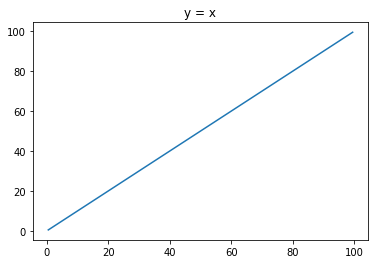

In [5]:
# Part 1: y = x

x = np.arange(0.5, 100.0, 0.5)
y = x
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = x")

Text(0.5, 1.0, 'y = x^2')

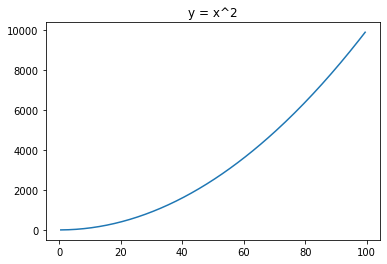

In [6]:
# Part 2: y = x^2

x = np.arange(0.5, 100.0, 0.5)
y = pow(x, 2)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = x^2")

Text(0.5, 1.0, 'y = x^3/100')

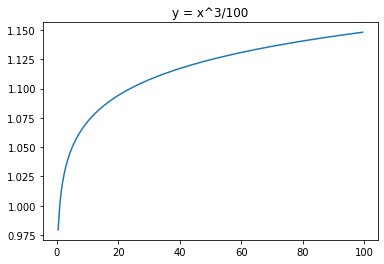

In [7]:
# Part 3: y = x^3/100

x = np.arange(0.5, 100.0, 0.5)
y = pow(x, 3/100)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = x^3/100")

Text(0.5, 1.0, 'y = sin(x)')

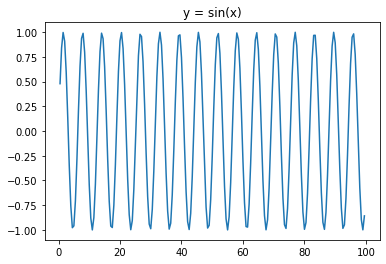

In [8]:
# Part 4: y = sin(x)

x = np.arange(0.5, 100.0, 0.5)
y = [math.sin(i) for i in x]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = sin(x)")

Text(0.5, 1.0, 'y = sin(x)/x')

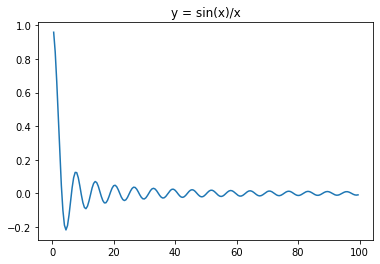

In [9]:
# Part 5: y = sin(x)/x

x = np.arange(0.5, 100.0, 0.5)
y = [math.sin(i)/i for i in x]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = sin(x)/x")

Text(0.5, 1.0, 'y = log(x)')

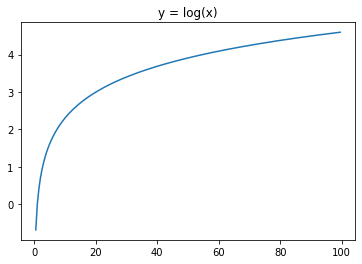

In [10]:
# Part 6: y = log(x)

x = np.arange(0.5, 100.0, 0.5)
y = [math.log(i) for i in x]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = log(x)")

Text(0.5, 1.0, 'y = e^x')

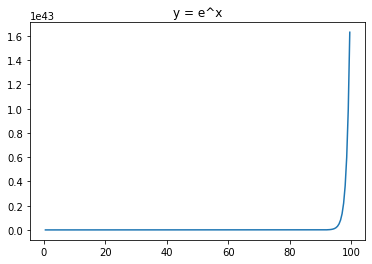

In [11]:
# Part 7: y = exp(x)

x = np.arange(0.5, 100.0, 0.5)
y = [math.exp(i) for i in x]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("y = e^x")

<br>



**Question_10**

In [12]:
import pandas as pd
import numpy as np 

# Creating a matrix M of size 20x5 of random numbers from 1-2
M = np.random.uniform(1, 2, size = (20, 5))

df = pd.DataFrame(M, columns=["a", "b", "c", "d", "e"])
print(df.head())
print("\n")

Standard_deviation = df.std()
print("The Standard deviation of all the columns are as follows: ")
print(Standard_deviation)
print("\nThe column with highest standard deviation is: ", df.std().idxmax(), " with the standard deviation of: ", df.std().max(), "\n")

Mean_rows = df.mean(axis = 1)
print("The mean of all the rows are as follows: ")
print(Mean_rows)
print("\nThe row with lowest mean is: ", df.mean(axis = 1).idxmin(), " with the standard deviation of: ", df.mean(axis = 1).min())


          a         b         c         d         e
0  1.258220  1.214168  1.502199  1.371808  1.517885
1  1.770177  1.205806  1.221034  1.507090  1.241741
2  1.093099  1.519090  1.172900  1.693043  1.802631
3  1.226766  1.884171  1.487899  1.019856  1.272517
4  1.453918  1.096929  1.454632  1.020829  1.721180


The Standard deviation of all the columns are as follows: 
a    0.281096
b    0.330670
c    0.336742
d    0.307267
e    0.286472
dtype: float64

The column with highest standard deviation is:  c  with the standard deviation of:  0.3367419482642232 

The mean of all the rows are as follows: 
0     1.372856
1     1.389170
2     1.456153
3     1.378242
4     1.349498
5     1.587206
6     1.239424
7     1.621685
8     1.697384
9     1.634857
10    1.505062
11    1.477335
12    1.625648
13    1.602301
14    1.384373
15    1.514761
16    1.435208
17    1.346049
18    1.547759
19    1.585753
dtype: float64

The row with lowest mean is:  6  with the standard deviation of:  1.2394236419

<br>



**Question_11**

In [13]:
# Creating another column f that is the sum of first 5 columns
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

# Column g is created usnig conditionl lamda function as follows:
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

# Here we are couting the number of rows where the value in the column "g" is "LT8"
no_rows = df.query("g == 'LT8'").shape[0]
print("The number of rows in the dataframe where the value in the column “g” is “LT8” is: ", no_rows)


df_LT8 = df.loc[df["g"] == "LT8", :]
df_GT8 = df.loc[df["g"] == "GT8", :]


std_LT8 = df_LT8["f"].std()
std_GT8 = df_GT8["f"].std()

print('The standard deviation for the rows where the value in the column "g" is "LT8" and "GT8" are as follows: ') 
print(std_LT8)
print(std_GT8)


The number of rows in the dataframe where the value in the column “g” is “LT8” is:  15
The standard deviation for the rows where the value in the column "g" is "LT8" and "GT8" are as follows: 
0.4949929288058941
0.18055917746931255


<br>



**Question_12**

Broadcasting in Numpy: 

NumPy's sophisticated broadcasting mechanism makes it possible to conduct arithmetic operations on arrays of all sizes and forms. In order for them to have compatible forms, the smaller array is "broadcast" across the larger array before the element-wise operation is carried out.

In [14]:
import numpy as np

# matrix A with shape (3, 4)
A = np.array([[1, 11, 111, 1111],
              [2, 22, 222, 2222],
              [3, 33, 333, 3333]])

print("The shape of Array A: ", A.shape)  


# An array B with shape (4,)
B = np.array([9, 99, 999, 9999])
print("The Shape of Array B: ", B.shape) 

R = A + B
print("\n")
print("The shape of resultant array R is: ", R.shape) 
print("The resultant matrix R is: \n", R)


The shape of Array A:  (3, 4)
The Shape of Array B:  (4,)


The shape of resultant array R is:  (3, 4)
The resultant matrix R is: 
 [[   10   110  1110 11110]
 [   11   121  1221 12221]
 [   12   132  1332 13332]]


In the above broadcasting example, the 1D array B is broadcast across the 2D array A to create a new resultant array R with the same shape as A, and the element-wise addition is performed between the corresponding elements of a and b.

<br>



**Question_13**

In [15]:
# a function to compute the argmin of a numpy array 

def argmin_self(arr):
  mini = arr[0] 
  index = 0  

  for ind, element in enumerate(arr):
    if element < mini:
      mini = element
      index = ind
        
  return index

# creating a random array of size 10, elements ranging from 0-9
Arr = np.random.randint(10, size = 10)

# Lets compare the argmin value from self built function and np.argmin
result_self = argmin_self(Arr)
result_numpy = np.argmin(Arr)

print("The array given is: ", Arr)

print("\nThe index of minimum of the array using the self built function (argmin_self): ", result_self)

print("\nThe index of minimum of the array using the in-built function (np.argmin): ", result_numpy)

assert result_self, result_numpy

The array given is:  [2 3 1 8 5 9 1 3 0 7]

The index of minimum of the array using the self built function (argmin_self):  8

The index of minimum of the array using the in-built function (np.argmin):  8
